# Kaggle Competition Titanic - Machine Learning from Disaster 

### Predicting survival on the Titanic

This notebook will be showcasing an ensemble of classification algorithms, used to predict the survival of passengers on the RMS Titanic. Kaggle has provided training and testing datasets, which contain the passengers' information. The data can be found [here](https://www.kaggle.com/c/titanic/data)

The passengers' data has the following features:
1. **survival**: Survival (0=No, 1=Yes)
2. **pclass**: Ticket class (1=1st, 2=2nd, 3=3rd)
3. **sex**: Sex
4. **Age**: Age in years
5. **sibsp**: # of siblings/spouses aboard the Titanic
6. **parch**: # of parents/children aboard the Titanic
7. **ticket**: Ticket number
8. **fare**: Passenger fare
9. **cabin**: Cabin number
10. **embarked**: Port of Embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)

We first import the data using pandas, into a dataframe.

In [21]:
import pandas as pd
# Column names are automatically assigned using the names attribute of the read_csv function
data=pd.read_csv('data/train_pandas.csv',names=['Passenger','Survived','PClass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])
# Display first five entries of the dataframe
data.head()

,Passenger,Survived,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Some of the features in the above dataset are **irrelevant**, like 'Name','Ticket'. We *drop* these columns from the dataframe.

In [22]:
data.drop(['Name','Ticket'],axis=1,inplace=True)
data.head()

,Passenger,Survived,PClass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


The dataset has certain **missing values** in the columns, 'Age' and 'Fare'. We use **data wrangling** to fill these missing values, with approximated *mean values*. These mean values are computed using 'PClass' and 'Sex'.

In [23]:
# Estimating missing age values for training data
# We use numpy to find 'Nan' or missing values
import numpy as np
# First we compute the mean value of male passengers, for every class.
for j in range(1,4):
    mean=data[(data['Sex']=='male') & (data['PClass']==j)]['Age'].mean()
    for i in data[(data['Sex']=='male') & (data['PClass']==j)]['Age'].index:
        if(np.any(np.isnan(data.loc[i,'Age']))):
            data.loc[i,'Age']=mean
# We, then, compute the mean value of female passengers, for every class.
for j in range(1,4):
    mean=data[(data['Sex']=='female') & (data['PClass']==j)]['Age'].mean()
    for i in data[(data['Sex']=='female') & (data['PClass']==j)]['Age'].index:
        if(np.any(np.isnan(data.loc[i,'Age']))):
            data.loc[i,'Age']=mean


Most classification algorithms need **categorical** data. The two features, **'Age' and 'Fare'**, that are in a numerical format, and not a categorical format, need to be categorized. We could either this by dividing the range of values in regular intervals, or we could perform **unsupervised clustering**. Clustering would allow the data to select its own class. We will choose to go with the latter, in this notebook.

Now the problem comes when we want to select the number of clusters, so as to make sure that each cluster is distinct from each other, and elements in the same cluster are as identical to each other as possible. We make use of a metric called the **Silhouette Score**, to find out the optimal number of clusters for each feature.

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters. The silhouette can be calculated with any distance metric, such as the Euclidean distance. [Silhouette Score](https://en.wikipedia.org/wiki/Silhouette_(clustering))

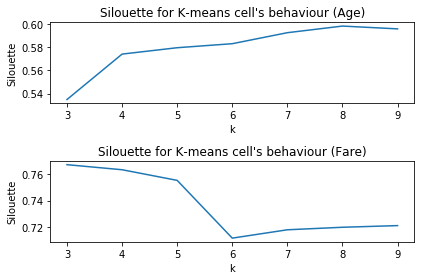

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X=data['Age'].values.reshape(-1,1)
Y=data['Fare'].values.reshape(-1,1)

# Array to store silhouette scores of age and fare for the range 3 to 9

si=[]
sj=[]

for i in range(3,10):
    kmeansi=KMeans(n_clusters=i,random_state=0)
    kmeansj=KMeans(n_clusters=i,random_state=0)
    kmeansi.fit(X)
    kmeansj.fit(Y)
    labelsi=kmeansi.labels_
    centroidsi=kmeansi.cluster_centers_
    labelsj=kmeansj.labels_
    centroidsj=kmeansj.cluster_centers_
    si.append(silhouette_score(X,labelsi,metric='euclidean'))
    sj.append(silhouette_score(Y,labelsj,metric='euclidean'))

plt.figure(1)

plt.subplot(211)
plt.plot(range(3,10),si)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour (Age)")

plt.subplot(212)
plt.plot(range(3,10),sj)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour (Fare)")

plt.tight_layout()
plt.show()


The above graphs show the silhouette scores for each feature, for number of clusters ranging from 3 to 9. For fare, the highest silhouette scores is visibly the highest for number of clusters = 3. For age, the scores keeps increasing for increasing number of clusters. We now perform clustering on the basis of these results. 

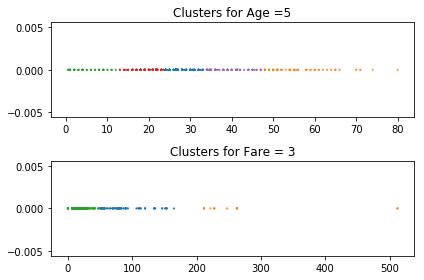

In [40]:
import matplotlib.cm as cm

# m is number of clusters for age, n is number of clusters for fare
m=5
n=3

colors=cm.rainbow(np.linspace(0,1,m))
colors1=cm.rainbow(np.linspace(0,1,n))

X=data['Age'].values.reshape(-1,1)
Y=data['Fare'].values.reshape(-1,1)


kmeans=KMeans(n_clusters=m,random_state=0).fit(X)
kmeans1=KMeans(n_clusters=n,random_state=0).fit(Y)

data['AnL']=kmeans.labels_
data['FnL']=kmeans1.labels_

plt.figure(1)

plt.subplot(211)
for i in range(m):
    X=data[data['AnL']==i]['Age'].values.reshape(-1,1)
    plt.scatter(X,np.zeros(len(X)),colors[i])
    plt.title('Clusters for Age =%d' %m)

plt.subplot(212)
for i in range(n):
    Y=data[data['FnL']==i]['Fare'].values.reshape(-1,1)
    plt.scatter(Y,np.zeros(len(Y)),colors1[i])
    plt.title('Clusters for Fare = %d' %n)

plt.tight_layout()
plt.show()

Now we need to replace all other features' values, with the appropriate categorical variable.
1. For 'Cabin', we replace each entry with '1' or '0', depending on whether they had a cabin or not.
2. For 'Embarked', we replace each of the letters with appropriate numbers, as some algorithms do not work with character categorical variable.
3. Similarly, for 'Sex', male is replaced by '1', and female by '2'.

After categorization, we split the training data into training data (sans the survival), and the corresponding target variable (survival). 

In [41]:
data['Cabin'].fillna(value=0,inplace=True)
data['Cabin'].replace(to_replace='\D*',value=1,inplace=True,regex=True)

data['Embarked'].replace(to_replace='S',value=1,inplace=True)
data['Embarked'].replace(to_replace='Q',value=2,inplace=True)
data['Embarked'].replace(to_replace='C',value=3,inplace=True)

data['Sex'].replace(to_replace='male',value=1,inplace=True)
data['Sex'].replace(to_replace='female',value=2,inplace=True)

training=data[['PClass','Sex','AnL','FnL','Cabin','Embarked']]
target=data['Survived']

print training.head()
print "\n"
print target.head()

   PClass  Sex  AnL  FnL  Cabin  Embarked
0       3    1    3    2      0         1
1       1    2    4    0      1         3
2       3    2    0    2      0         1
3       1    2    4    0      1         1
4       3    1    4    2      0         1


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


This entire process is now repeated for the testing data as well.

In [42]:
test=pd.read_csv('data/test_pandas.csv',names=['PassengerID','PClass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])

for j in range(1,4):
    mean=test[(test['Sex']=='male') & (test['PClass']==j)]['Age'].mean()
    for i in test[(test['Sex']=='male') & (test['PClass']==j)]['Age'].index:
        if(np.any(np.isnan(test.loc[i,'Age']))):
            test.loc[i,'Age']=mean
            
for j in range(1,4):
    mean=test[(test['Sex']=='female') & (test['PClass']==j)]['Age'].mean()
    for i in test[(test['Sex']=='female') & (test['PClass']==j)]['Age'].index:
        if(np.any(np.isnan(test.loc[i,'Age']))):
            test.loc[i,'Age']=mean

X=test['Age'].values.reshape(-1,1)
Y=test['Fare'].values.reshape(-1,1)

test['AnL']=kmeans.predict(X)
test['FnL']=kmeans1.predict(Y)

test['Cabin'].fillna(value=0,inplace=True)
test['Cabin'].replace(to_replace='\D*',value=1,inplace=True,regex=True)

test['Embarked'].replace(to_replace='S',value=1,inplace=True)
test['Embarked'].replace(to_replace='Q',value=2,inplace=True)
test['Embarked'].replace(to_replace='C',value=3,inplace=True)

test['Sex'].replace(to_replace='male',value=1,inplace=True)
test['Sex'].replace(to_replace='female',value=2,inplace=True)

testing=test[['PClass','Sex','AnL','FnL','Cabin','Embarked']]


We now make use of the classification algorithms, to predict the surival values for the testing data. In this notebook, we will make use of the following algorithms:
1. Gaussian Naive Bayes [Theory](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Gaussian_naive_Bayes)
2. Iterative Dichotomiser 3 (ID3)[Theory](https://en.wikipedia.org/wiki/ID3_algorithm)
3. Random Forest [Theory](https://en.wikipedia.org/wiki/Random_forest)

We make use of the sklearn package [Documentation](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

gnb=GaussianNB()
testpred=gnb.fit(training,target).predict(testing)
test['Survived']=testpred
test[['PassengerID','Survived']].to_csv('NaiveBayes.csv',index=False)

rfc=RandomForestClassifier()
testpred=rfc.fit(training,target).predict(testing)
test['Survived']=testpred
test[['PassengerID','Survived']].to_csv('RandomForest.csv',index=False)

clf=tree.DecisionTreeClassifier()
testpred=clf.fit(training,target).predict(testing)
test['Survived']=testpred
test[['PassengerID','Survived']].to_csv('ID3.csv',index=False)

Now all that is left to experiment with the number of clusters, and submit the resulting predictions (CSV files) to Kaggle. 

<img src="Kaggle.png">

Following are the results obtained:

Gaussian Naive Bayes

- Clusters (Age) = 4, Clusters(Fare) = 3, 0.70335.
- Clusters (Age) = 3, Clusters(Fare) = 2, 0.74641.
- Clusters (Age) = 5, Clusters(Fare) = 3, 0.71292.

Iterative Dichotomiser 3 (ID3)

- Clusters (Age) = 4, Clusters(Fare) = 3, 0.78469.
- Clusters (Age) = 3, Clusters(Fare) = 2, 0.77512.
- Clusters (Age) = 5, Clusters(Fare) = 3, 0.78469.

Random Forest

- Clusters (Age) = 4, Clusters(Fare) = 3, 0.77512.
- Clusters (Age) = 3, Clusters(Fare) = 2, 0.77033.
- Clusters (Age) = 5, Clusters(Fare) = 3, 0.76555.
    
Below is a graphical comparison of the algorithms.

<img src="AlgoComparison.png">

Visibly, ID3 algorithm consistently gives better performance over the other two.